# Emotion Detection from Text

## Installing Libraries

In [102]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sb
import matplotlib.pyplot as plt

# Text Cleaning package
import re
import nltk
import string

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
# from sklearn.pipeline import Pipeline

# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# other
import warnings
warnings.filterwarnings("ignore")

## 1. Dataset

In [104]:
df = pd.read_csv("text_emotions.csv")
df.head()

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [105]:
df.head(20)

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [106]:
df['sentiment'] = df['sentiment'].map({'joy':'Happy' , 'sadness': 'Sad', 'anger': 'Anger', 'love' : 1 , 'surprise' : 2 , 'fear' : 3})

In [107]:
df.head()

,content,sentiment
0,i didnt feel humiliated,Sad
1,i can go from feeling so hopeless to so damned...,Sad
2,im grabbing a minute to post i feel greedy wrong,Anger
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,Anger


In [108]:
df = df[df['sentiment'] != 1]
df = df[df['sentiment'] != 2]
df = df[df['sentiment'] != 3]

In [109]:
df.head(20)

,content,sentiment
0,i didnt feel humiliated,Sad
1,i can go from feeling so hopeless to so damned...,Sad
2,im grabbing a minute to post i feel greedy wrong,Anger
4,i am feeling grouchy,Anger
5,ive been feeling a little burdened lately wasn...,Sad
8,i have been with petronas for years i feel tha...,Happy
10,i feel like i have to make the suffering i m s...,Sad
11,i do feel that running is a divine experience ...,Happy
12,i think it s the easiest time of year to feel ...,Anger
13,i feel low energy i m just thirsty,Sad


In [110]:
df['sentiment'].value_counts()

sentiment
Happy    6761
Sad      5797
Anger    2709
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

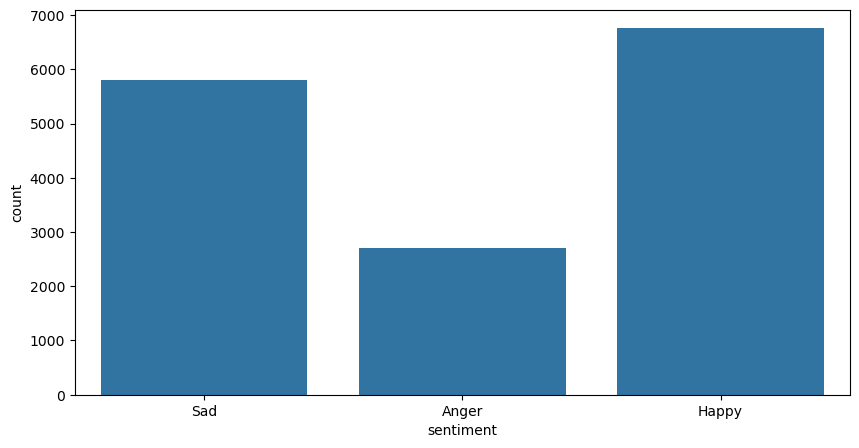

In [111]:
sb.countplot(x='sentiment',data=df)

In [112]:
df["content"]

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
4                                     i am feeling grouchy
5        ive been feeling a little burdened lately wasn...
                               ...                        
19995    im having ssa examination tomorrow in the morn...
19996    i constantly worry about their fight against n...
19997    i feel its important to share this info for th...
19998    i truly feel that if you are passionate enough...
19999    i feel like i just wanna buy any cute make up ...
Name: content, Length: 15267, dtype: object

## 2. Pre-processing text data
1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root wordordord

### 2.1 Remove Punctuations

In [115]:
emojis = pd.read_csv('emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['content'].apply(lambda x: remove_punct(x))
df.head(10)

,content,sentiment,Tweet_punct
0,i didnt feel humiliated,Sad,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,Sad,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,Anger,im grabbing a minute to post i feel greedy wrong
4,i am feeling grouchy,Anger,i am feeling grouchy
5,ive been feeling a little burdened lately wasn...,Sad,ive been feeling a little burdened lately wasn...
8,i have been with petronas for years i feel tha...,Happy,i have been with petronas for years i feel tha...
10,i feel like i have to make the suffering i m s...,Sad,i feel like i have to make the suffering i m s...
11,i do feel that running is a divine experience ...,Happy,i do feel that running is a divine experience ...
12,i think it s the easiest time of year to feel ...,Anger,i think it s the easiest time of year to feel ...
13,i feel low energy i m just thirsty,Sad,i feel low energy i m just thirsty


### 2.2 Tokenization

In [117]:
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized
0,i didnt feel humiliated,Sad,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,Sad,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,Anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
4,i am feeling grouchy,Anger,i am feeling grouchy,"[i, am, feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,Sad,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late..."
8,i have been with petronas for years i feel tha...,Happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,..."
10,i feel like i have to make the suffering i m s...,Sad,i feel like i have to make the suffering i m s...,"[i, feel, like, i, have, to, make, the, suffer..."
11,i do feel that running is a divine experience ...,Happy,i do feel that running is a divine experience ...,"[i, do, feel, that, running, is, a, divine, ex..."
12,i think it s the easiest time of year to feel ...,Anger,i think it s the easiest time of year to feel ...,"[i, think, it, s, the, easiest, time, of, year..."
13,i feel low energy i m just thirsty,Sad,i feel low energy i m just thirsty,"[i, feel, low, energy, i, m, just, thirsty]"


### 2.3 Remove Stopwords

In [119]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
              'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
                ,'brother','dad','basic','im'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,i didnt feel humiliated,Sad,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated]
1,i can go from feeling so hopeless to so damned...,Sad,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,Anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]"
4,i am feeling grouchy,Anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,Sad,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]"
8,i have been with petronas for years i feel tha...,Happy,i have been with petronas for years i feel tha...,"[i, have, been, with, petronas, for, years, i,...","[petronas, years, petronas, performed, well, m..."
10,i feel like i have to make the suffering i m s...,Sad,i feel like i have to make the suffering i m s...,"[i, feel, like, i, have, to, make, the, suffer...","[like, make, suffering, seeing, mean, something]"
11,i do feel that running is a divine experience ...,Happy,i do feel that running is a divine experience ...,"[i, do, feel, that, running, is, a, divine, ex...","[running, divine, experience, expect, type, sp..."
12,i think it s the easiest time of year to feel ...,Anger,i think it s the easiest time of year to feel ...,"[i, think, it, s, the, easiest, time, of, year...","[think, easiest, time, dissatisfied]"
13,i feel low energy i m just thirsty,Sad,i feel low energy i m just thirsty,"[i, feel, low, energy, i, m, just, thirsty]","[low, energy, thirsty]"


### 2.4 Lemmatization

In [122]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized
0,i didnt feel humiliated,Sad,i didnt feel humiliated,"[i, didnt, feel, humiliated]",[humiliated],[humiliated]
1,i can go from feeling so hopeless to so damned...,Sad,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,Anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[grabbing, minute, post, greedy, wrong]","[grabbing, minute, post, greedy, wrong]"
4,i am feeling grouchy,Anger,i am feeling grouchy,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feeling, grouchy]"
5,ive been feeling a little burdened lately wasn...,Sad,ive been feeling a little burdened lately wasn...,"[ive, been, feeling, a, little, burdened, late...","[feeling, little, burdened, lately, wasnt, sure]","[feeling, little, burdened, lately, wasnt, sure]"


### Token Frequency in a sentence after preprocessing

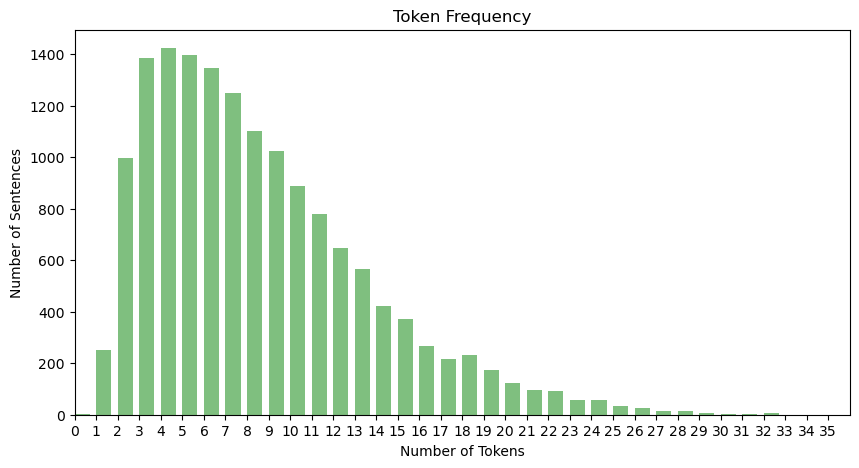

In [124]:
token_lengths = [len(t) for t in df['Tweet_lemmatized']]
plt.hist(token_lengths,bins=33,width = 0.7, fc="green",alpha=0.5)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.title('Token Frequency')
x_Values = [i for i in range(36)] 
plt.xticks(x_Values)
plt.xlim(0,36)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

### All in one (Text preprocessing)

In [126]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

## Feature Extraction using Count Vectorizer and TF-IDF

### Train Test Split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size=0.3, random_state = 0)

## 3. Count Vectorizer and TF-IDF 

In [131]:
countVectorizer1 = CountVectorizer(analyzer=clean_text)
countVector1 = countVectorizer1.fit_transform(X_train)

countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

## 4. Models
1) Support Vector Machine(SVM)
2) Logistic Regression
3) Random Forest Classifier
4) XGBoost Classifier
5) Multinomial Naive Bayes
6) Decision Tree Classifier

### 4.1 Support Vector Machine

In [134]:
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 95.438
Precision: 95.179
Recall: 94.122
F1-score: 94.620
              precision    recall  f1-score   support

       Anger       0.94      0.89      0.92       797
       Happy       0.97      0.98      0.97      2034
         Sad       0.95      0.96      0.95      1750

    accuracy                           0.95      4581
   macro avg       0.95      0.94      0.95      4581
weighted avg       0.95      0.95      0.95      4581



### 4.1.1 Confusion Matrix

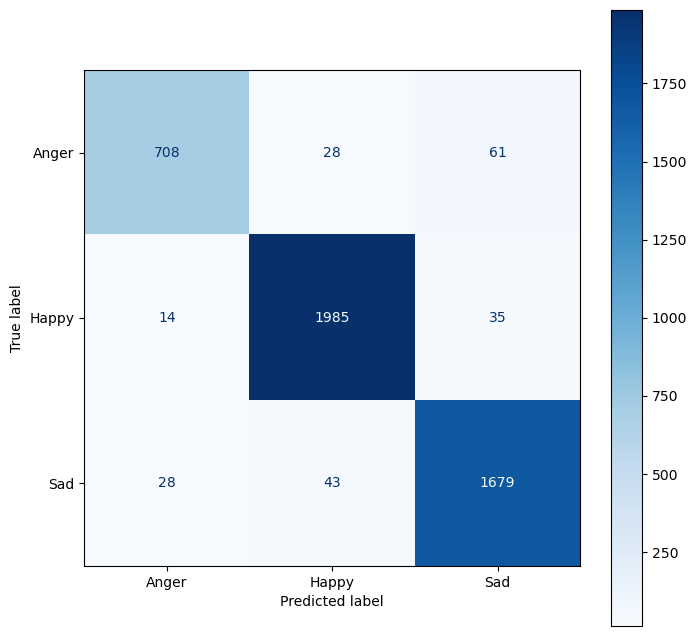

In [136]:
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_svm.plot(ax=ax,cmap='Blues')

## 4.2 Logistic Regression

In [138]:
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_test, y_pred, average='macro')
lr_recal = recall_score(y_test, y_pred, average='macro')
lr_cm = confusion_matrix(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 94.150
Precision: 94.527
Recall: 91.770
F1-score: 92.956
              precision    recall  f1-score   support

       Anger       0.96      0.82      0.89       797
       Happy       0.94      0.98      0.96      2034
         Sad       0.94      0.95      0.94      1750

    accuracy                           0.94      4581
   macro avg       0.95      0.92      0.93      4581
weighted avg       0.94      0.94      0.94      4581



### 4.2.1 Confusion Matrix

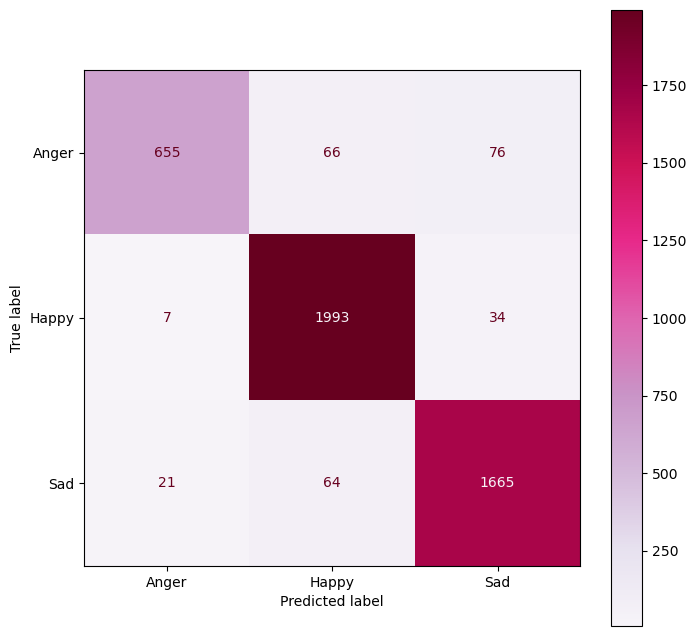

In [140]:
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd')

## 4.3 Random Forest Classifier

In [142]:
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

rfc_acc = accuracy_score(y_pred, y_test)
rfc_prec = precision_score(y_test, y_pred, average='macro')
rfc_recal = recall_score(y_test, y_pred, average='macro')
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 78.935
Precision: 78.719
Recall: 77.498
F1-score: 77.989
              precision    recall  f1-score   support

       Anger       0.78      0.71      0.74       797
       Happy       0.83      0.79      0.81      2034
         Sad       0.75      0.82      0.78      1750

    accuracy                           0.79      4581
   macro avg       0.79      0.77      0.78      4581
weighted avg       0.79      0.79      0.79      4581



### 4.3.1 Confusion Matrix

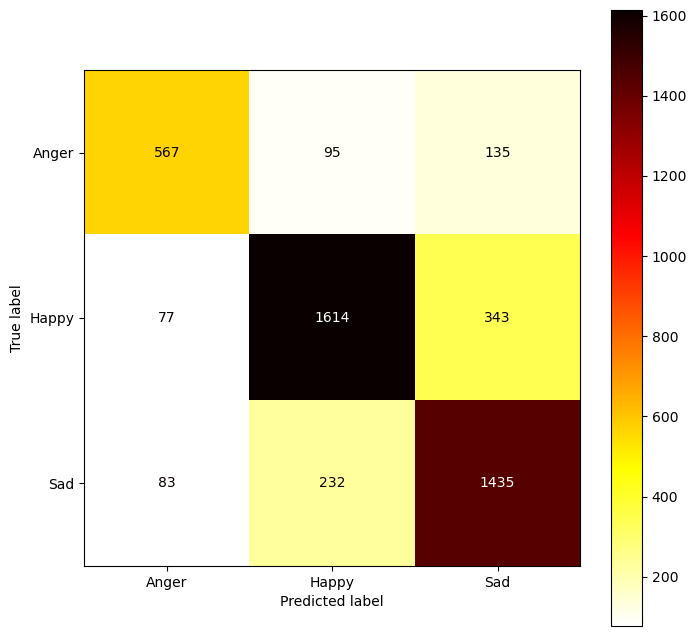

In [144]:
cm_display_rfc = ConfusionMatrixDisplay(rfc_cm, display_labels=rfc.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_rfc.plot(ax=ax,cmap='hot_r')

## 4.4 Multinomial Naive Bayes Classifier

In [146]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

mnb_acc = accuracy_score(y_pred, y_test)
mnb_prec = precision_score(y_test, y_pred, average='macro')
mnb_recal = recall_score(y_test, y_pred, average='macro')
mnb_cm = confusion_matrix(y_test,y_pred)
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 85.287
Precision: 89.450
Recall: 75.493
F1-score: 77.078
              precision    recall  f1-score   support

       Anger       1.00      0.35      0.52       797
       Happy       0.84      0.98      0.91      2034
         Sad       0.84      0.93      0.89      1750

    accuracy                           0.85      4581
   macro avg       0.89      0.75      0.77      4581
weighted avg       0.87      0.85      0.83      4581



### 4.4.1 Confusion Matrix

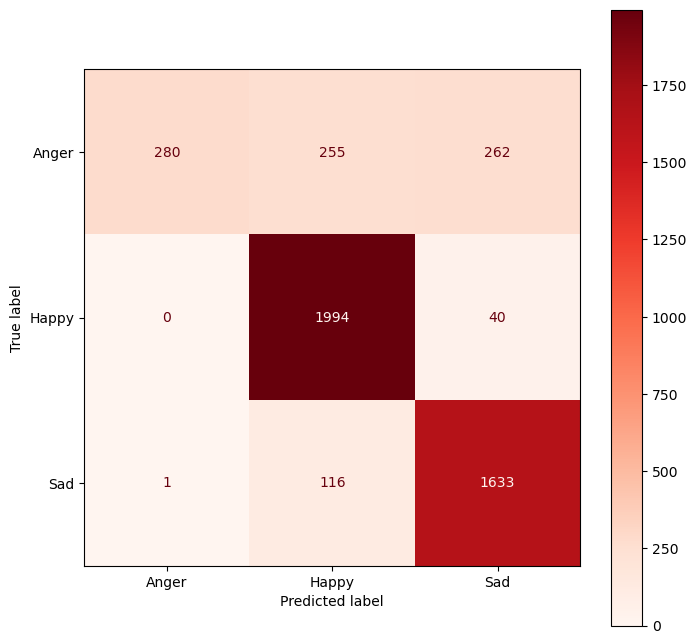

In [148]:
cm_display_mnb = ConfusionMatrixDisplay(mnb_cm, display_labels=mnb.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_mnb.plot(ax=ax,cmap='Reds')

## 4.5 Decision Tree Classifier

In [150]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_test, y_pred, average='macro')
dt_recal = recall_score(y_test, y_pred, average='macro')
dt_cm = confusion_matrix(y_test,y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 93.233
Precision: 92.211
Recall: 92.559
F1-score: 92.360
              precision    recall  f1-score   support

       Anger       0.88      0.90      0.89       797
       Happy       0.97      0.93      0.95      2034
         Sad       0.91      0.95      0.93      1750

    accuracy                           0.93      4581
   macro avg       0.92      0.93      0.92      4581
weighted avg       0.93      0.93      0.93      4581



### 4.5.1 Confusion Matrix

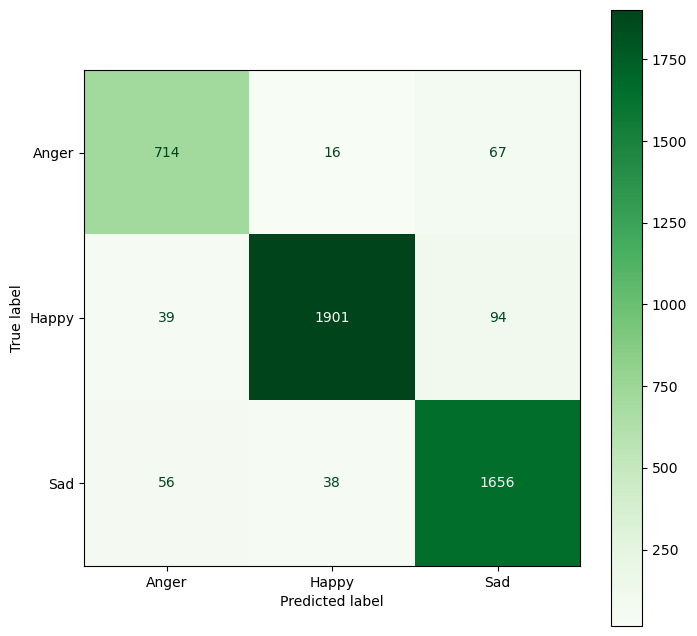

In [152]:
cm_display_dt = ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(8,8)) # adjust the size
cm_display_dt.plot(ax=ax,cmap='Greens')


## 5. Summary Visualization

In [154]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))
        
    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))
        
    return per_emotion_precision, per_emotion_recall

### 5.1 Precision of all models

In [156]:
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec}, 
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,Random Forest,Naive Bayes,Decision Tree
Anger,94.400,95.900,77.992,99.644,88.257
Happy,96.547,93.877,83.153,84.313,97.238
Sad,94.592,93.803,75.013,84.393,91.139


### 5.2 Recall of all models

In [158]:
per_recall_list = pd.DataFrame({'Support vector Machine' : svm_per_recall,
                                'Logistic Regression' : lr_per_recall,
                                'Random Forest' : rfc_per_recall,
                                'Naive Bayes' : mnb_per_recall,
                                'Decision Tree' : dt_per_recall}, 
                                index=svm.classes_)
per_recall_list

,Support vector Machine,Logistic Regression,Random Forest,Naive Bayes,Decision Tree
Anger,88.833,82.183,71.142,35.132,89.586
Happy,97.591,97.984,79.351,98.033,93.461
Sad,95.943,95.143,82.000,93.314,94.629


### 5.3 Accuracy Visualization for all models

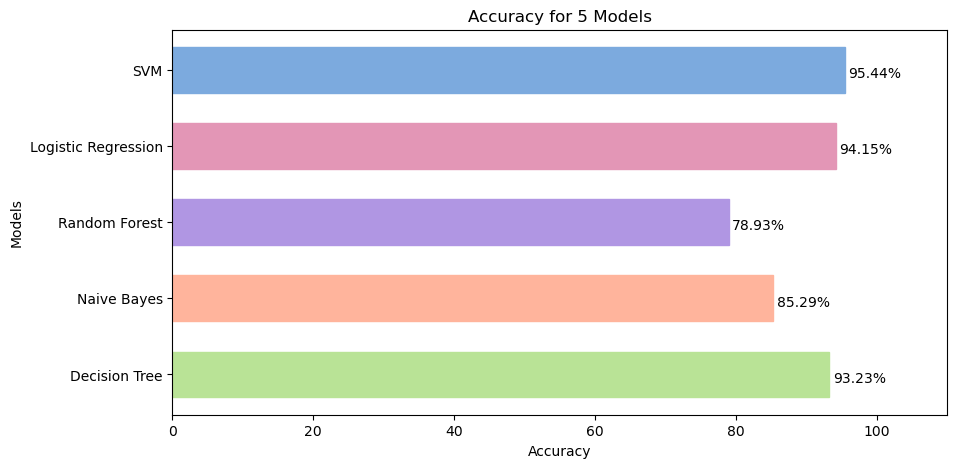

In [160]:
algorithms = ['SVM','Logistic Regression','Random Forest','Naive Bayes','Decision Tree']
algorithm_acc = [svm_acc*100, lr_acc*100, rfc_acc*100, mnb_acc*100, dt_acc*100]

algorithms = ['Decision Tree','Naive Bayes','Random Forest','Logistic Regression','SVM']
algorithm_acc = [dt_acc*100, mnb_acc*100, rfc_acc*100, lr_acc*100, svm_acc*100]
# Figure Size
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
bar_list[4].set_color('#7CAADE')
bar_list[3].set_color('#E396B6')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 5 Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)
    
plt.show()

## 6. Prediction

In [162]:
while True:
    input_str = input("What's in your mind: ")
    if input_str == 'nothing':
        break
        
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))
    print('Emotion using SVM: ',end = '')
    print(svm.predict(processed_text))
    print('Emotion using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Emotion using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Emotion using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Emotion using Random Forest: ',end = '')
    print(rfc.predict(processed_text))

What's in your mind:  I am very sorry


Emotion using SVM: ['Sad']
Emotion using Logistic Regression: ['Sad']
Emotion using Decision Tree: ['Sad']
Emotion using Naive Bayes: ['Sad']
Emotion using Random Forest: ['Sad']


What's in your mind:  I had a bad dream last night


Emotion using SVM: ['Sad']
Emotion using Logistic Regression: ['Sad']
Emotion using Decision Tree: ['Sad']
Emotion using Naive Bayes: ['Sad']
Emotion using Random Forest: ['Sad']


What's in your mind:  I am enjoying a lot with my friends


Emotion using SVM: ['Happy']
Emotion using Logistic Regression: ['Happy']
Emotion using Decision Tree: ['Happy']
Emotion using Naive Bayes: ['Happy']
Emotion using Random Forest: ['Happy']


What's in your mind:  I am very angry today


Emotion using SVM: ['Anger']
Emotion using Logistic Regression: ['Anger']
Emotion using Decision Tree: ['Anger']
Emotion using Naive Bayes: ['Anger']
Emotion using Random Forest: ['Anger']


What's in your mind:  Lesssss Goooo!!!


Emotion using SVM: ['Happy']
Emotion using Logistic Regression: ['Happy']
Emotion using Decision Tree: ['Happy']
Emotion using Naive Bayes: ['Happy']
Emotion using Random Forest: ['Happy']


What's in your mind:  nothing
